In [1]:
#autoreload
%load_ext autoreload
%autoreload 2

In [2]:

import numpy as np
import pandas as pd
from model import *
from viz import *
from dataset import *

In [3]:
df = pd.read_csv('data/buildings/datasets/2024/GATES_zone-tloads.csv')
df.index = pd.to_datetime(df['Date'])
df = df.drop(columns=['Date'])
df.resample('H').mean()
df.index = pd.to_datetime(df.index)


/var/folders/n7/7ln3k6zx5hj40n1dc441clm40000gn/T/ipykernel_52215/1664114304.py:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df.resample('H').mean()


In [4]:
weather = pd.read_csv('data/buildings/datasets/2024/weather.csv')
weather.index = pd.to_datetime(weather['Date']) 
weather = weather.drop(columns=['Date'])
weather.resample('H').mean()
weather.index = pd.to_datetime(weather.index)


/var/folders/n7/7ln3k6zx5hj40n1dc441clm40000gn/T/ipykernel_52215/1644617037.py:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  weather.resample('H').mean()


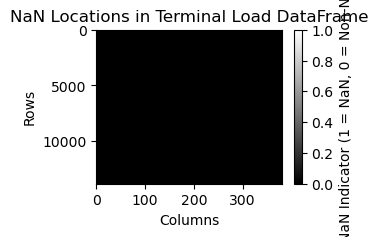

Days where all VAV columns have NaN values:
DatetimeIndex(['2024-07-18 23:00:00', '2024-07-18 23:15:00'], dtype='datetime64[ns]', name='Date', freq=None)


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
def nan_viz(df):
    # Visualize NaN locations
    nan_locations = df.isna().astype(int)
    plt.figure(figsize=(3, 2))
    plt.imshow(nan_locations, aspect='auto', cmap='gray', interpolation='nearest')
    plt.colorbar(label='NaN Indicator (1 = NaN, 0 = Non-NaN)')
    plt.xlabel('Columns')
    plt.ylabel('Rows')
    plt.title('NaN Locations in Terminal Load DataFrame')
    plt.show()
    
    # Find days where all VAV columns have NaN values
    all_nan_days = df.index[df.isna().all(axis=1)]
    return all_nan_days

# Example usage
all_nan_days = nan_viz(df)
print("Days where all VAV columns have NaN values:")
print(all_nan_days)

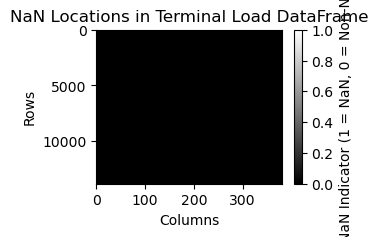

DatetimeIndex(['2024-07-18 23:00:00', '2024-07-18 23:15:00'], dtype='datetime64[ns]', name='Date', freq=None)

In [6]:
nan_viz(df)

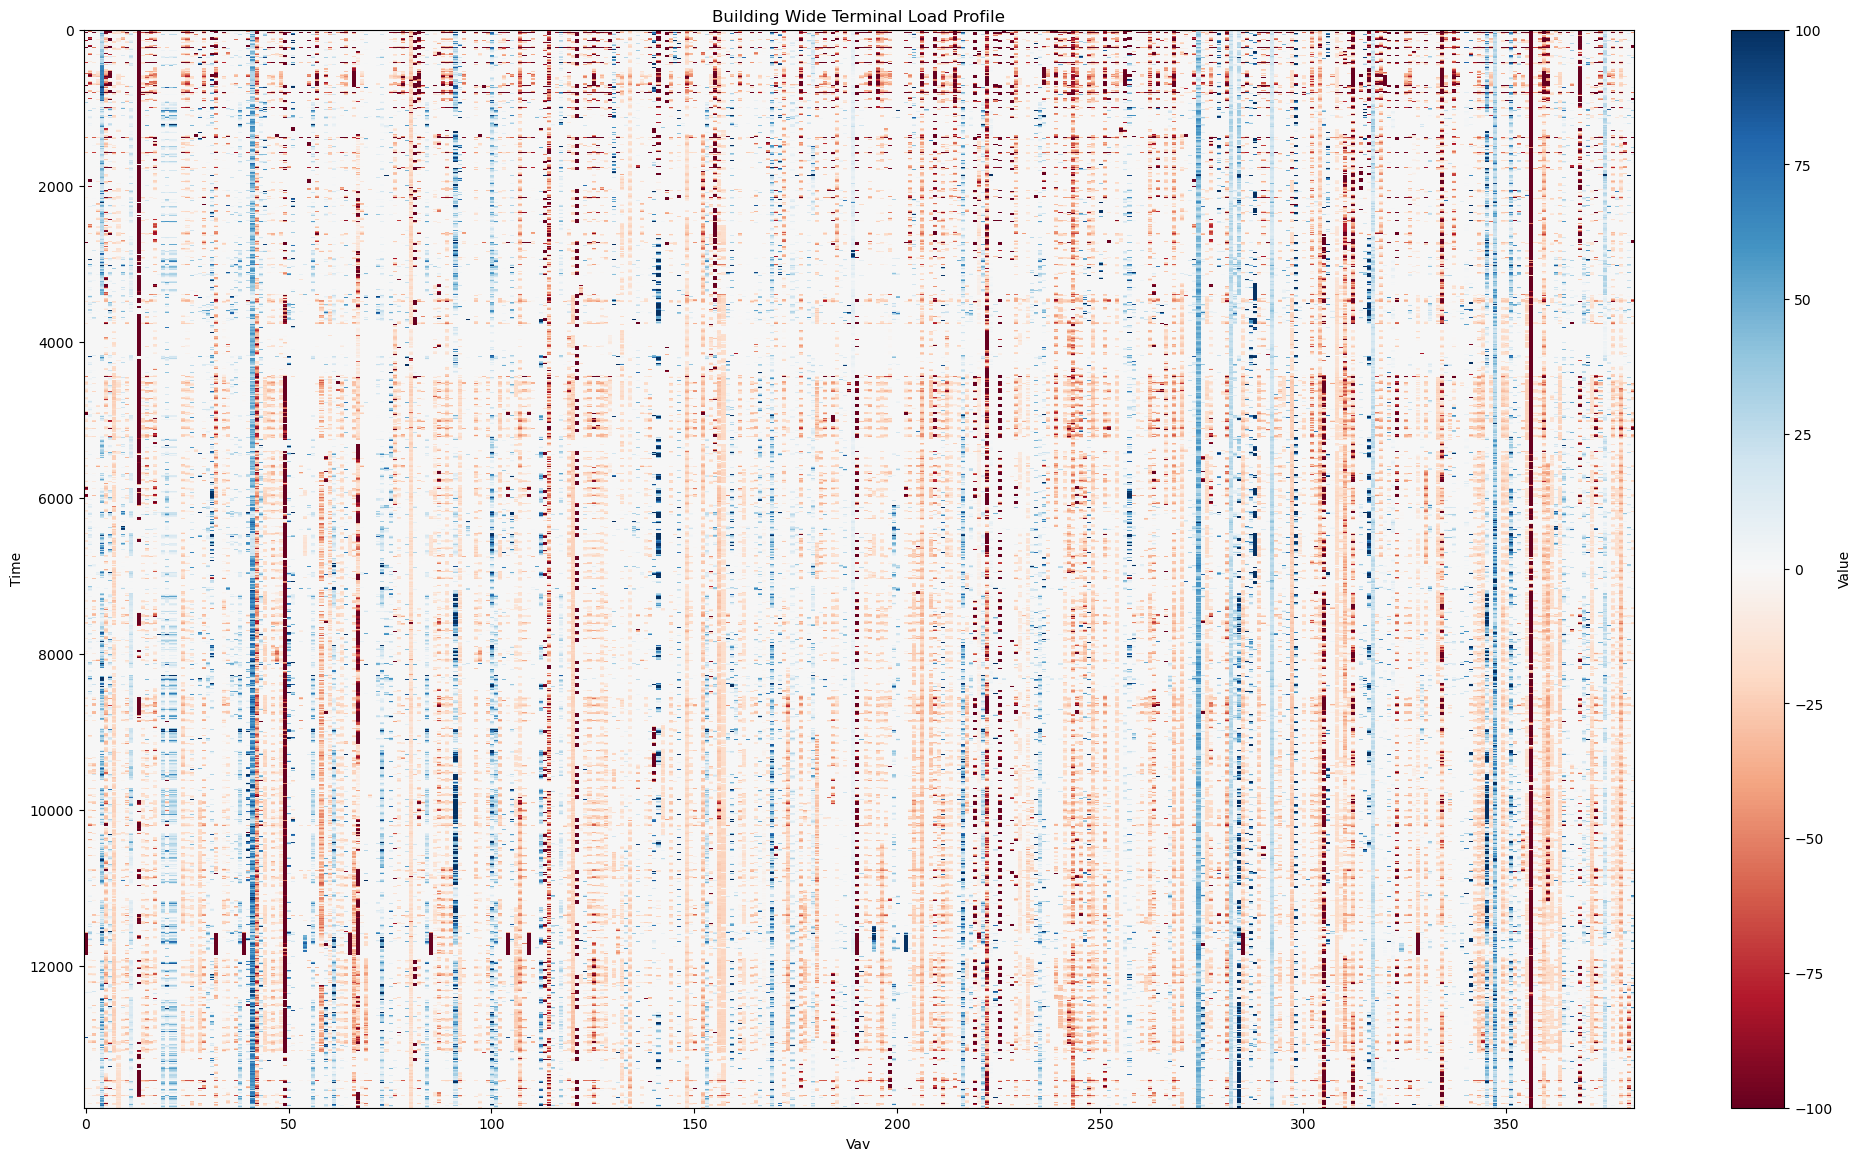

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def tload_viz(df):    
    # Assuming df is your DataFrame
    # Create a copy of the DataFrame to avoid modifying the original
    df_copy = df.copy()

    # Define the custom colormap
    cmap = plt.cm.RdBu  # Red to Blue colormap
    cmap.set_bad(color='black')  # Set color for NaN values

    # Replace NaN values with a masked array
    masked_array = np.ma.masked_invalid(df_copy)

    # Plot the DataFrame with the custom colormap
    plt.figure(figsize=(25, 14))
    plt.imshow(masked_array, aspect='auto', cmap=cmap, interpolation='nearest')
    plt.colorbar(label='Value')
    plt.xlabel('Vav')
    plt.ylabel('Time')
    plt.title('Building Wide Terminal Load Profile')
    plt.show()

tload_viz(df)

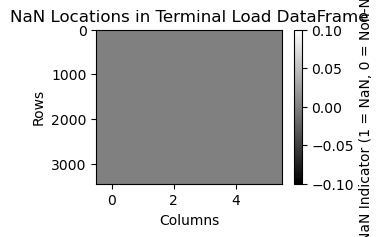

DatetimeIndex([], dtype='datetime64[ns]', name='Date', freq=None)

In [8]:
nan_viz(weather)

In [9]:
df.describe()

,VAV 2-119-C,VAV 3-481-B,VAV 3-292-A,VAV 2-203-B,VAV 2-213-A,VAV 2-456,VAV 2-101,VAV 3-265,VAV 3-463,VAV 2-302-A,...,VAV 1-152,VAV 3-368,VAV 3-471A,VAV 3-284A,VAV 2-314-B,VAV 1-B29-A,VAV 2-312,VAV 3-494-B,VAV 3-190,VAV 1-326-B
count,13822.000000,13822.000000,13822.000000,13822.000000,13822.000000,13822.000000,13822.000000,13822.000000,13822.000000,13822.000000,...,13822.000000,13822.000000,13822.000000,13822.000000,13822.000000,13822.000000,13822.000000,13822.000000,13822.000000,13822.000000
mean,-4.300717,-0.723387,-1.706195,-0.914516,25.260949,-14.795270,0.851583,-13.225809,-2.356354,0.262879,...,-9.430961,-3.760887,15.299123,0.736311,-9.676371,-4.223703,-19.601399,-1.261300,-2.346237,-1.215203
std,18.935769,13.737404,7.856616,4.226917,23.469205,21.334471,23.647932,11.113303,5.471107,11.259907,...,24.454271,15.186882,11.313248,8.198619,13.736581,9.106720,15.847521,9.168149,14.085623,14.312674
min,-100.000000,-100.000000,-99.965233,-55.314813,0.000000,-100.000000,-100.000000,-100.000000,-48.319913,-99.925120,...,-100.000000,-100.000000,0.000000,-100.000000,-100.000000,-97.110933,-100.000000,-100.000000,-100.000000,-100.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,-23.762170,0.000000,-22.725020,0.000000,0.000000,...,0.000000,-0.085091,5.241532,0.000000,-18.870907,-10.950080,-29.176269,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,21.902637,-5.904803,0.000000,-17.213579,0.000000,0.000000,...,0.000000,0.000000,16.882910,0.000000,-0.421405,0.000000,-19.800550,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,39.757313,0.000000,3.133932,0.000000,0.000000,0.000000,...,0.000000,0.000000,24.039721,0.000000,0.000000,0.000000,-4.397764,0.000000,0.000000,0.000000
max,100.000000,100.000000,100.000000,17.942375,100.000000,28.489774,100.000000,34.641386,0.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,24.205453,100.000000,0.000000,100.000000,100.000000,98.078493


We have time series for a given building, corresponding do each zone terminal load, a measure of how needy a zone i in term of cooling or reheat. 

We'll denote this:

$$T_{load}^{(z,t)}$$

With $t$ indexing the time and $z$ denoting the zone of the building. We have  382  zone in this building, which makes a vector of 
$$T_{load, building}^{t} \in \mathbb R ^{(382,1)}$$

We also have a input feature timeseries, which is common for all the building as well. This includes features such as Outside Air temperautre or solar irradiation. 

$$W^{t}$$

In the code the weather dataframe is formatted like so:
| Date                | temperature | RH  | Tdew | wind | sun_rad | daily_rain |
|---------------------|-------------|-----|------|------|---------|------------|
| 2023-05-01 00:00:00 | 52.6        | 75.0| 44.8 | 9.2  | 0.0     | 0.00       |
| 2023-05-01 01:00:00 | 52.4        | 75.0| 44.7 | 7.4  | 0.0     | 0.00       |
| 2023-05-01 02:00:00 | 52.2        | 75.0| 44.4 | 9.0  | 0.0     | 0.00       |

And the 

| Date                | VAV2-33 | VAV2-17   | VAV3-18 | VAV4-22    | VAV2-20 | VAV1-18 | VAV2-03   | VAV3-06 | VAV2-31 | VAV2-29 | ... | VAV2-11 | VAV2-32 | VAV4-25    | VAV4-08 | VAV1-02   | VAV0-00-4  | VAV0-04 | VAV1-12 | VAV2-18 | VAV3-15 |
|---------------------|---------|-----------|---------|------------|---------|---------|-----------|---------|---------|---------|-----|---------|---------|------------|---------|-----------|------------|---------|---------|---------|---------|
| 2023-05-01 00:00:00 | 0.0     | 0.000000  | 0.0     | -10.687083 | 0.0     | 0.0     | -5.494500 | 0.000000| 0.0     | -100.0  | ... | 0.0     | 0.0     | -16.662916 | 0.0     | -0.435333 | -8.518917  | 0.0     | 0.0     | 0.0     | 0.000000|
| 2023-05-01 01:00:00 | 0.0     | -0.355917 | 0.0     | -10.881667 | 0.0     | 0.0     | -7.798417 | 0.000000| 0.0     | -100.0  | ... | 0.0     | 0.0     | -16.492833 | 0.0     | -7.894917 | -7.576250  | 0.0     | 0.0     | 0.0     | 0.000000|
| 2023-05-01 02:00:00 | 0.0     | -0.559250 | 0.0     | -10.827083 | 0.0     | 0.0     | -6.123417 | 0.000000| 0.0     | -100.0  | ... | 0.0     | 0.0     | -16.670916 | 0.0     | -6.497750 | -8.176333  | 0.0     | 0.0     | 0.0     | -1.364750|

I want to train a LSTM architecture that will for an input of the past 2 weeks of data of terminal load vector, will try to predict the next week. I also have the exact weather for the two past weeks and the predicting wek (that could be a forcecast in real life use), to help the prediction of model, as those should be correlated in some ways. 

Give me a way to start formatting my code to have such a model, train it and test it. I want to have september has my validation set. 


# Quick look at the data

In [10]:
df.describe()

,VAV 2-119-C,VAV 3-481-B,VAV 3-292-A,VAV 2-203-B,VAV 2-213-A,VAV 2-456,VAV 2-101,VAV 3-265,VAV 3-463,VAV 2-302-A,...,VAV 1-152,VAV 3-368,VAV 3-471A,VAV 3-284A,VAV 2-314-B,VAV 1-B29-A,VAV 2-312,VAV 3-494-B,VAV 3-190,VAV 1-326-B
count,13822.000000,13822.000000,13822.000000,13822.000000,13822.000000,13822.000000,13822.000000,13822.000000,13822.000000,13822.000000,...,13822.000000,13822.000000,13822.000000,13822.000000,13822.000000,13822.000000,13822.000000,13822.000000,13822.000000,13822.000000
mean,-4.300717,-0.723387,-1.706195,-0.914516,25.260949,-14.795270,0.851583,-13.225809,-2.356354,0.262879,...,-9.430961,-3.760887,15.299123,0.736311,-9.676371,-4.223703,-19.601399,-1.261300,-2.346237,-1.215203
std,18.935769,13.737404,7.856616,4.226917,23.469205,21.334471,23.647932,11.113303,5.471107,11.259907,...,24.454271,15.186882,11.313248,8.198619,13.736581,9.106720,15.847521,9.168149,14.085623,14.312674
min,-100.000000,-100.000000,-99.965233,-55.314813,0.000000,-100.000000,-100.000000,-100.000000,-48.319913,-99.925120,...,-100.000000,-100.000000,0.000000,-100.000000,-100.000000,-97.110933,-100.000000,-100.000000,-100.000000,-100.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,-23.762170,0.000000,-22.725020,0.000000,0.000000,...,0.000000,-0.085091,5.241532,0.000000,-18.870907,-10.950080,-29.176269,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,21.902637,-5.904803,0.000000,-17.213579,0.000000,0.000000,...,0.000000,0.000000,16.882910,0.000000,-0.421405,0.000000,-19.800550,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,39.757313,0.000000,3.133932,0.000000,0.000000,0.000000,...,0.000000,0.000000,24.039721,0.000000,0.000000,0.000000,-4.397764,0.000000,0.000000,0.000000
max,100.000000,100.000000,100.000000,17.942375,100.000000,28.489774,100.000000,34.641386,0.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,24.205453,100.000000,0.000000,100.000000,100.000000,98.078493


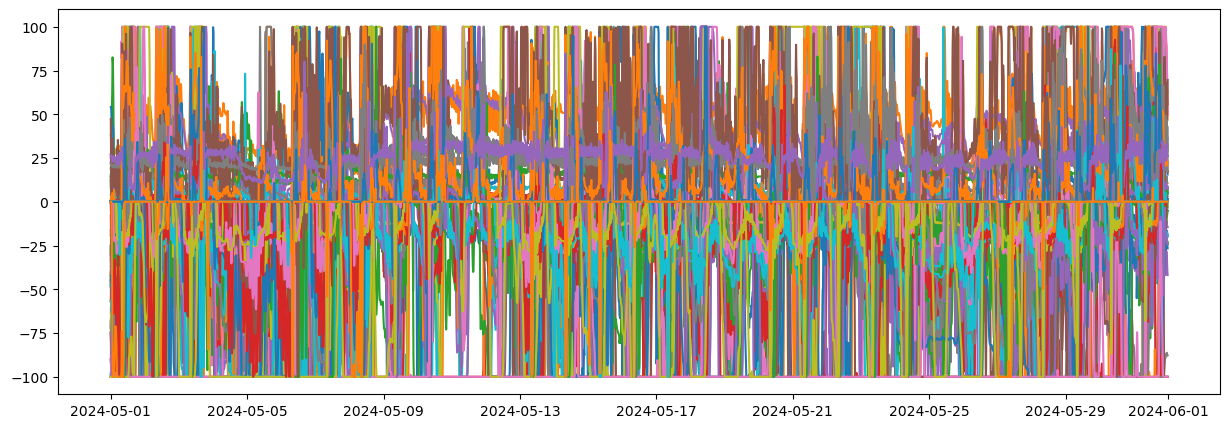

In [11]:
plt.figure(figsize=(15,5))
for col in df.columns[10:]:
    plt.plot(df.loc[df.index.month == 5,col], label=col)

In [12]:
# Make sure both dataframes have datetime indices
df.index = pd.to_datetime(df.index)
weather.index = pd.to_datetime(weather.index)

# Train the model
model, train_losses, val_losses, train_dataset, val_dataset, train_loader, val_loader = get_trained_model(df, weather, n_epochs=500)

Checking data availability...
Terminal loads date range: 2024-04-29 00:00:00 to 2024-09-19 23:45:00
Weather data date range: 2024-04-29 00:00:00 to 2024-09-19 23:00:00

Using split date: 2024-08-21 00:00:00

Checking data sizes:
Training set hours: 10944
Validation set hours: 2880
Minimum required hours: 216

Creating datasets...
Created 105 valid sequences
First sequence shapes:
Input loads: (168, 382)
Input weather: (168, 6)
Target loads: (48, 382)
Target weather: (48, 6)
Created 22 valid sequences
First sequence shapes:
Input loads: (168, 382)
Input weather: (168, 6)
Target loads: (48, 382)
Target weather: (48, 6)

Creating dataloaders...

Initializing model...

Starting training...
Training on device: mps
Number of training batches: 4
Number of validation batches: 1
Epoch [5/500], Train Loss: 0.7950, Val Loss: 0.9150
Epoch [10/500], Train Loss: 0.7100, Val Loss: 0.8559
Epoch [15/500], Train Loss: 0.6377, Val Loss: 0.8530
Epoch [20/500], Train Loss: 0.6053, Val Loss: 0.8389
Epoch [2

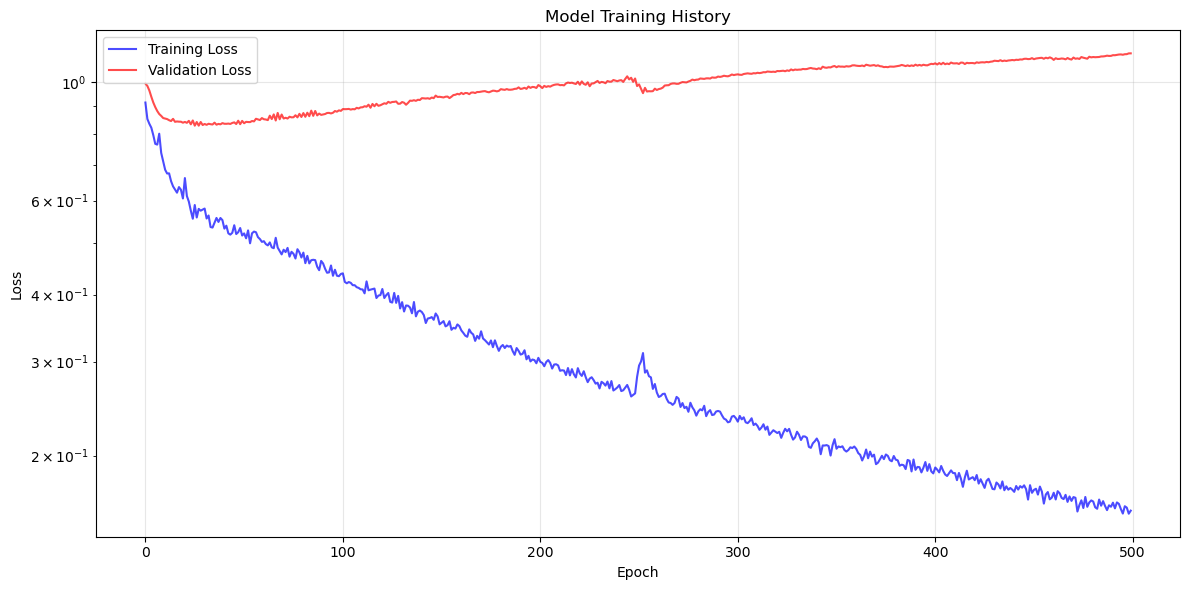

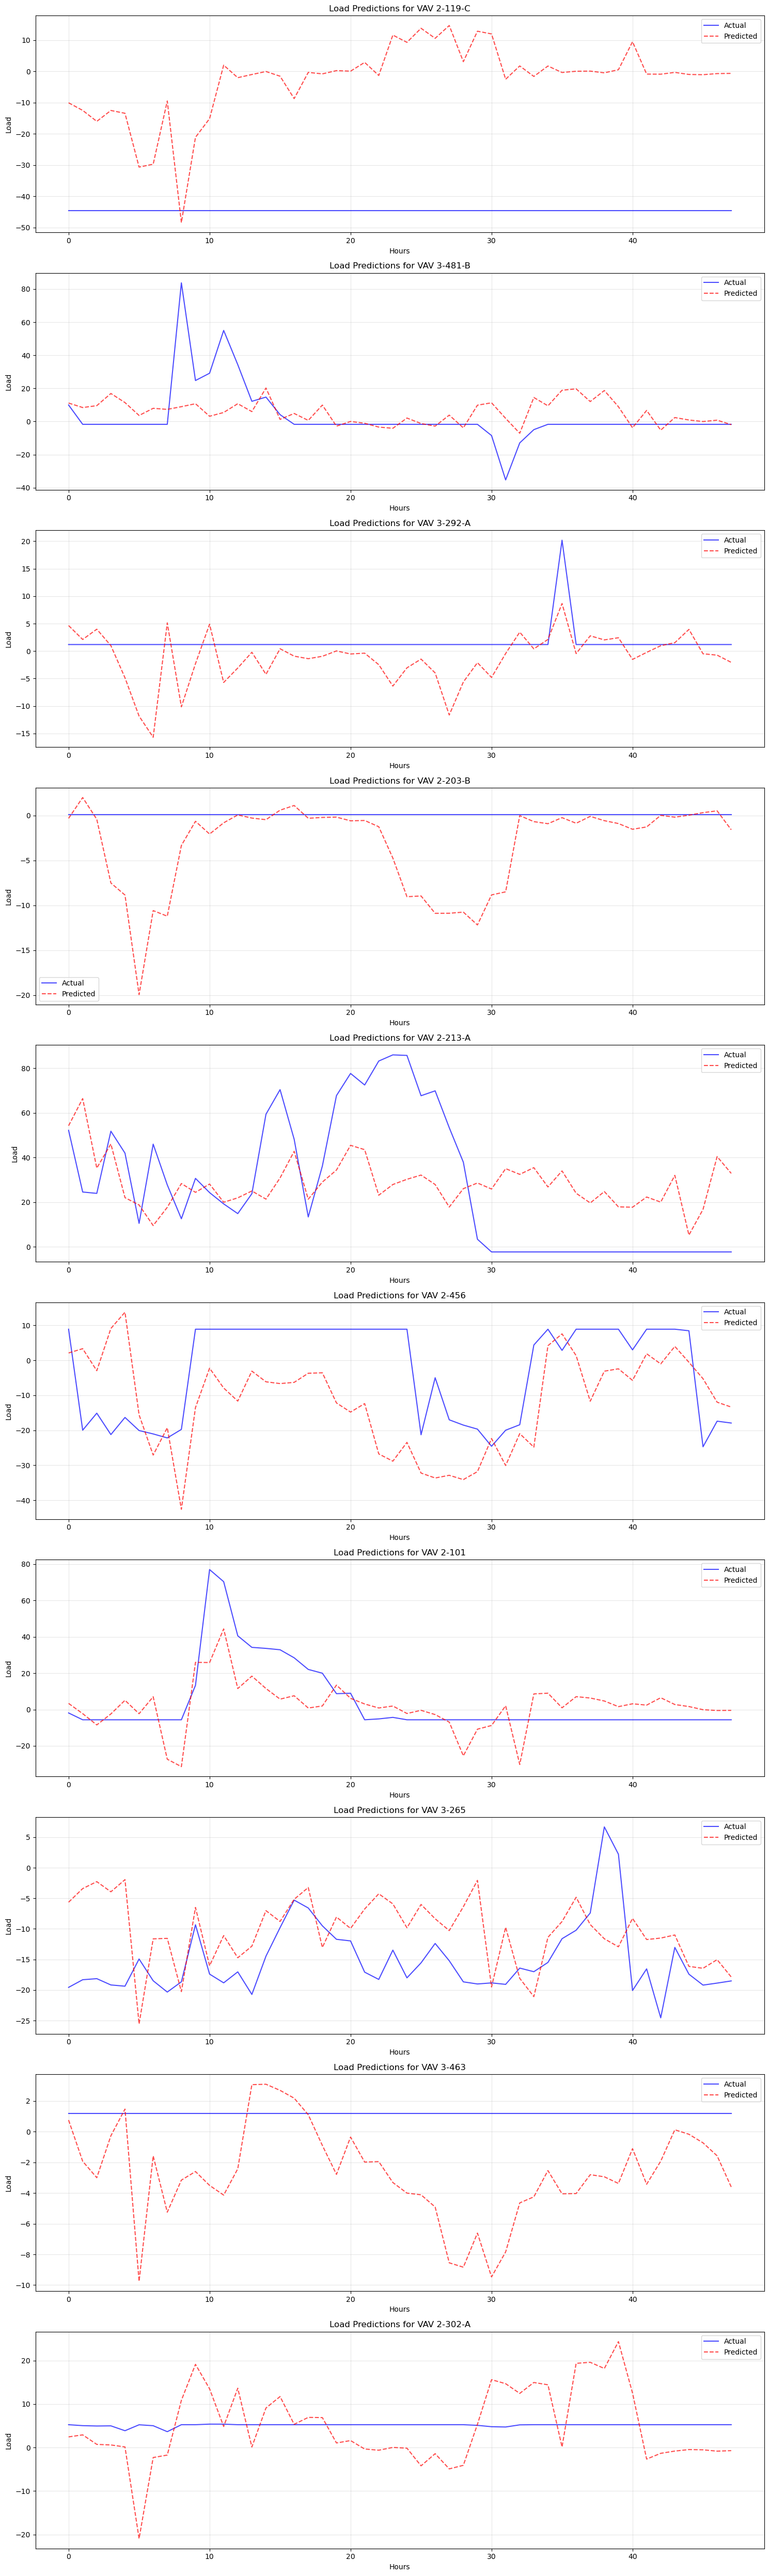

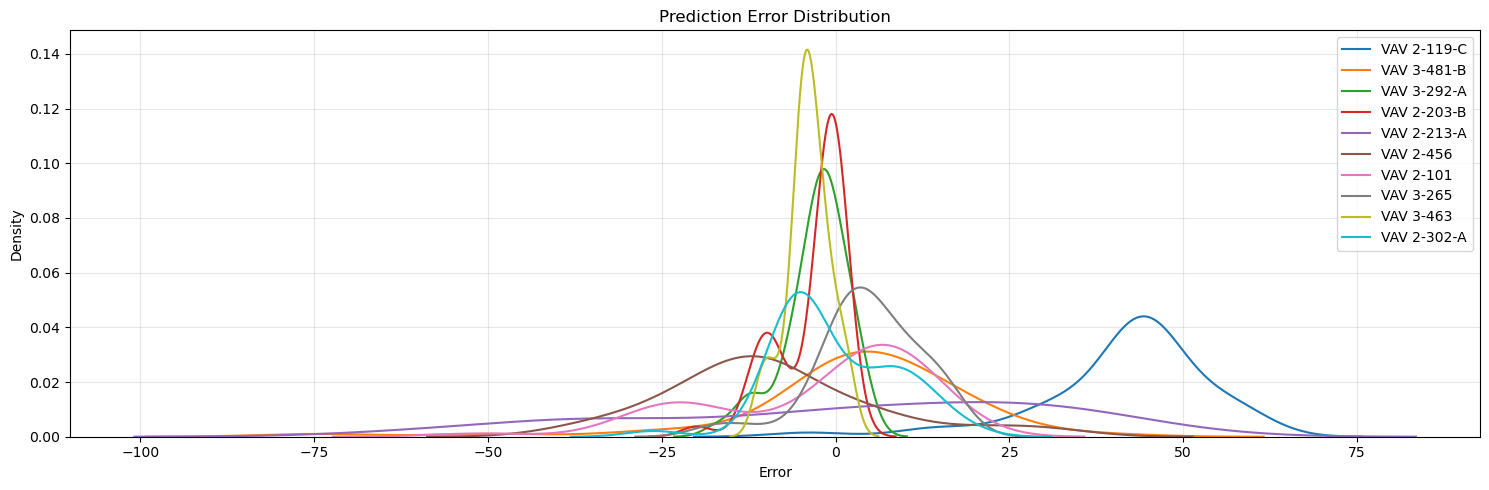


Prediction Metrics:
--------------------------------------------------

VAV 2-119-C:
MAPE: 93.94%
RMSE: 43.29

VAV 3-481-B:
MAPE: 336.62%
RMSE: 17.63

VAV 3-292-A:
MAPE: 304.43%
RMSE: 5.34

VAV 2-203-B:
MAPE: 3716.78%
RMSE: 5.90

VAV 2-213-A:
MAPE: 500.97%
RMSE: 29.19

VAV 2-456:
MAPE: 158.54%
RMSE: 17.65

VAV 2-101:
MAPE: 140.33%
RMSE: 15.29

VAV 3-265:
MAPE: 58.28%
RMSE: 8.86

VAV 3-463:
MAPE: 348.79%
RMSE: 4.95

VAV 2-302-A:
MAPE: 138.11%
RMSE: 8.54


In [14]:
# Correct way to call visualize_results
visualize_results(
    model=model,
    dataset=val_dataset,  # The dataset object
    load_scaler=train_dataset.load_scaler,  # The actual scaler object
    train_losses=train_losses,
    val_losses=val_losses,
    zones_names=df.columns,
    sample_idx=0,
    zones_to_plot=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
)